S Harisankar | Date: 06-10-22

## Program to implement Naïve Bayes Algorithm using any standard dataset available in the public domain and find the accuracy of the algorithm

## importing dataset and preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# import dataset with latin-1 encoding

df = pd.read_csv('datasets/spam.csv',encoding='latin-1')
display(df)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
# dropping unwanted columns

df= df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
# renaming columns

df = df.rename(columns={"v1":"label", "v2":"sms"})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# max length of sms
print(len(df))

# no of observations in spam and ham
df.label.value_counts()

5572


ham     4825
spam     747
Name: label, dtype: int64

In [15]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
#length column with len of each msg
df['length'] = df['sms'].apply(len)
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
#splitting into taining and test sets

x=df['sms']
y=df['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

print(x_train)

872                       I'll text you when I drop x off
831     Hi mate its RV did u hav a nice hol just a mes...
1273    network operator. The service is free. For T &...
3314    FREE MESSAGE Activate your 500 FREE Text Messa...
4929    Hi, the SEXYCHAT girls are waiting for you to ...
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: sms, Length: 4179, dtype: object


In [21]:
# using count vectorier for each word count for both training and testing data

from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)

## using naive bayes algorithm

In [22]:
#fitting multinomial naive bayes

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(train_data, y_train)

MultinomialNB()

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(test_data)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


[[1193    3]
 [  16  181]]


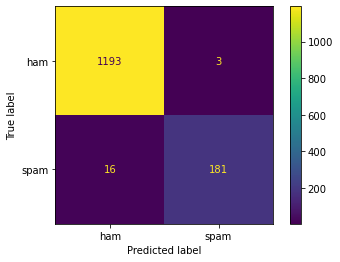

In [25]:
# confusion matrix

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

## testing accuracy

In [30]:

training_score = classifier.score(train_data, y_train)
test_score = classifier.score(test_data, y_test)
print("training score:", training_score)
print("test score:", test_score)
print("\n")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label="spam")))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label="spam")))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label="spam")))

training score: 0.9928212491026561
test score: 0.9863603732950467


Accuracy score: 0.9863603732950467
Precision score: 0.9836956521739131
Recall score: 0.9187817258883249
F1 score: 0.9501312335958005


## word cloud representation

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 458 kB 2.5 MB/s eta 0:00:01


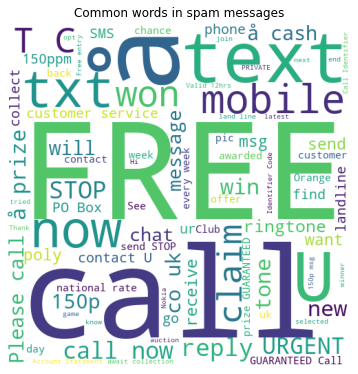

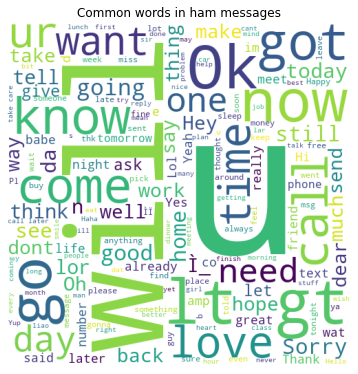

In [31]:

!pip install wordcloud
from wordcloud import WordCloud

# Get the spam messages
spam = df[df['label']=='spam']['sms'].str.cat(sep=', ')
# Get the ham messages
ham = df[df['label']=='ham']['sms'].str.cat(sep=', ')
# Initialize the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')
# Generate the world clouds for each type of message
spam_wc = wc.generate(spam)
# plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0)
plt.show()
# plot the world cloud for ham
ham_wc = wc.generate(ham)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(ham_wc)
plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0)
plt.show()